<a href="https://colab.research.google.com/github/Espipi/DataInsightProgram/blob/master/script_parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Load package
import os, sys
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir())

['.config', 'sample_data']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
##Load the dataset and the 3 first lines 
df = pd.read_csv('/content/sample_data/parkinsons.data')
df.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


## **A. Description of the data set**

In [ ]:

with open('/content/sample_data/parkinsons.names', 'r') as f:
    data = f.read()
    
print(data)


**1**.   **Data Set Information**\
This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

**2.**   **Attribute Information**\
Matrix column entries (attributes):\
name - ASCII subject name and recording number\
MDVP:Fo(Hz) - Average vocal fundamental frequency\
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency\
MDVP:Flo(Hz) - Minimum vocal fundamental frequency\
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency\
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice\
status - Health status of the subject (one) - Parkinson's, (zero) - healthy\
RPDE,D2 - Two nonlinear dynamical complexity measures\
DFA - Signal fractal scaling exponent\
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## **B. Exploratory Data Analysis**

#### ***Health status of the subject***

Healthy : 48 Proportion: 24.62 %
Sick: 147 Proportion: 75.38 %


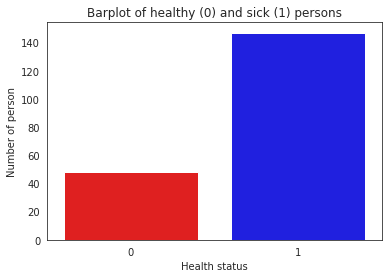

In [ ]:
###Plotting number of healthy (0) and sick (1) persons
sns.set_style("white")
sns.countplot(df['status'], palette=["red", "blue"]).set(title = "Barplot of healthy (0) and sick (1) persons", 
                                                             xlabel = 'Health status', ylabel ='Number of person')
#plt.xlabel('Health status')
#plt.ylabel('Number of person')
###Print
h = df[df['status']==0]['status'].count()
s = df[df['status']==1]['status'].count()

print('Healthy :',h ,'Proportion:', round((h*100/(h+s)),2),"%")
print('Sick:',s,'Proportion:' ,round((s*100/(h+s)), 2),"%" )
plt.show()

The number of sick individuals is 147, i.e. nearly 75% of the total.


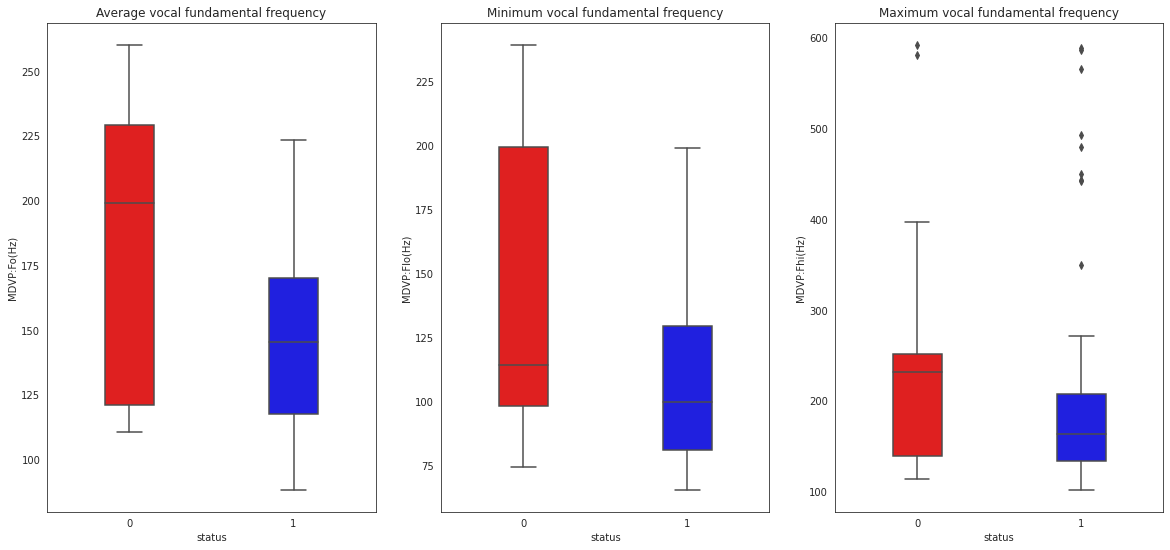

In [ ]:
##set plot parameters
fig, ax = plt.subplots(1,3,figsize=(15,9))

##Boxplot for the average vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Fo(Hz)', data=df, width=0.3,
                palette=["red", "blue"], ax=ax[0]).set(title = 'Average vocal fundamental frequency')

##Boxplot for the minimum vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Flo(Hz)', data=df, width=0.3,
                palette=["red", "blue"], ax=ax[1]).set(title = "Minimum vocal fundamental frequency")

##Boxplot for the maximum vocal fundamental frequency
sns.boxplot(x='status',y='MDVP:Fhi(Hz)', data=df, width=0.3,
                palette=["red", "blue"], ax=ax[2]).set(title = "Maximum vocal fundamental frequency")
plt.show()



For the average vocal fundamental frequency (MDVP:Fo(Hz)), the median value is around 199 Hz for people who are normal. For people who are affected with Parkinsons the median value comes around 145 Hz. For the maximum vocal fundamental frequency (MDVP:Fhi(Hz)), there are probably many outliers such for the 2 kind of status.\
For the 3 parameters we can note that the number of healthy people are higher than the number of sick people.

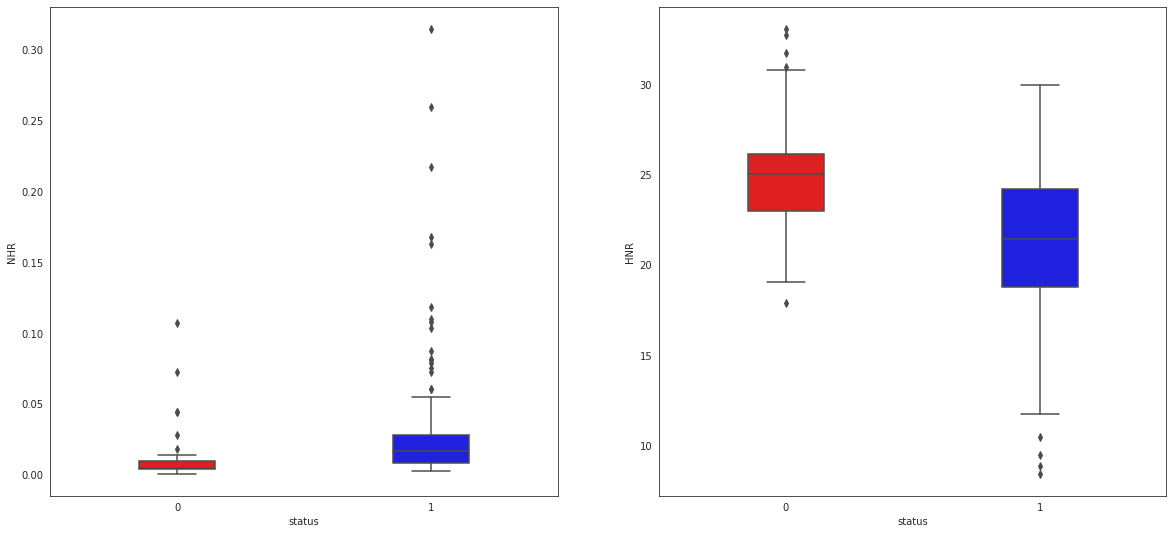

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (20,9))
col_names = ["NHR","HNR"]
for i in range(0, len(col_names)):
    sns.boxplot(x='status', y=col_names[i], data=df, width=0.3, palette=["red", "blue"], ax = axs[i])
plt.show()



People who have the disease have higher levels of Noise to Harmonic ratio. Looking to the second boxplot, the HNR ratio for people who have PD are lower levels than healthy individuals.


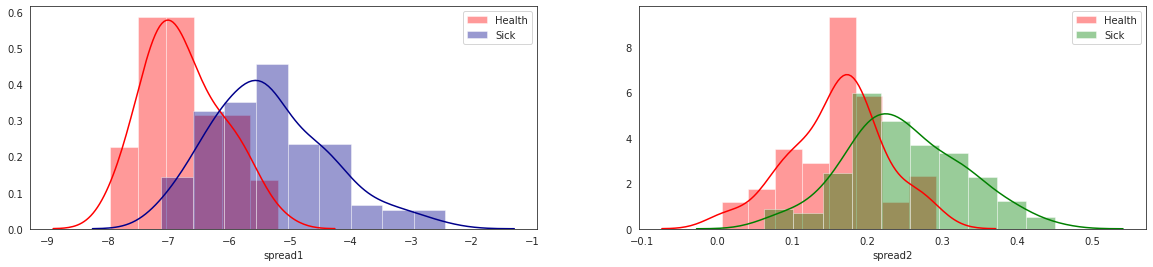

In [ ]:
plt.figure(figsize=(20,9))

plt.subplot(2,2,1)
sns.distplot(df[df['status']==0]['spread1'], label="Health",color='red')
sns.distplot(df[df['status']==1]['spread1'], label="Sick", color='darkblue')
plt.legend()
plt.subplot(2,2,2)
sns.distplot(df[df['status']==0]['spread2'], label="Health", color='red')
sns.distplot(df[df['status']==1]['spread2'], label="Sick", color='green')
plt.legend()
plt.show()

In [7]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test for spread1
stat_s1_0, p_s1_0 = shapiro(df[df['status']==0]['spread1'])
stat_s1_1, p_s1_1 = shapiro(df[df['status']==1]['spread1'])

# normality test for spread2

stat_s2_0, p_s2_0 = shapiro(df[df['status']==0]['spread2'])
stat_s2_1, p_s2_1 = shapiro(df[df['status']==1]['spread2'])

print('s1_0:','Statistics=%.3f, p=%.3f' % (stat_s1_0, p_s1_0))
print('s1_1:','Statistics=%.3f, p=%.3f' % (stat_s1_1, p_s1_1))
print('s2_0:','Statistics=%.3f, p=%.3f' % (stat_s2_0, p_s2_0))
print('s2_1:','Statistics=%.3f, p=%.3f' % (stat_s2_1, p_s2_1))
# interpret
# if p > 0.05,Sample looks Gaussian


s1_0: Statistics=0.974, p=0.371
s1_1: Statistics=0.975, p=0.009
s2_0: Statistics=0.981, p=0.640
s2_1: Statistics=0.991, p=0.520


If `p_value > 0.005`, data simple looks Gaussian so is normally distributed.\
Spread1 is normally distributed between person  who is normal (***p=0.371***). People who have spread1 between - 8.5 and -7.5 are more and they are normal. People whose spread1 is between -6.5 and -5 are having PD.\
Spread2 data for people get PD and healthy person is normally distributed (respectively ***p=0.640, p=0.520***)

#### ***Correlation between parameters***

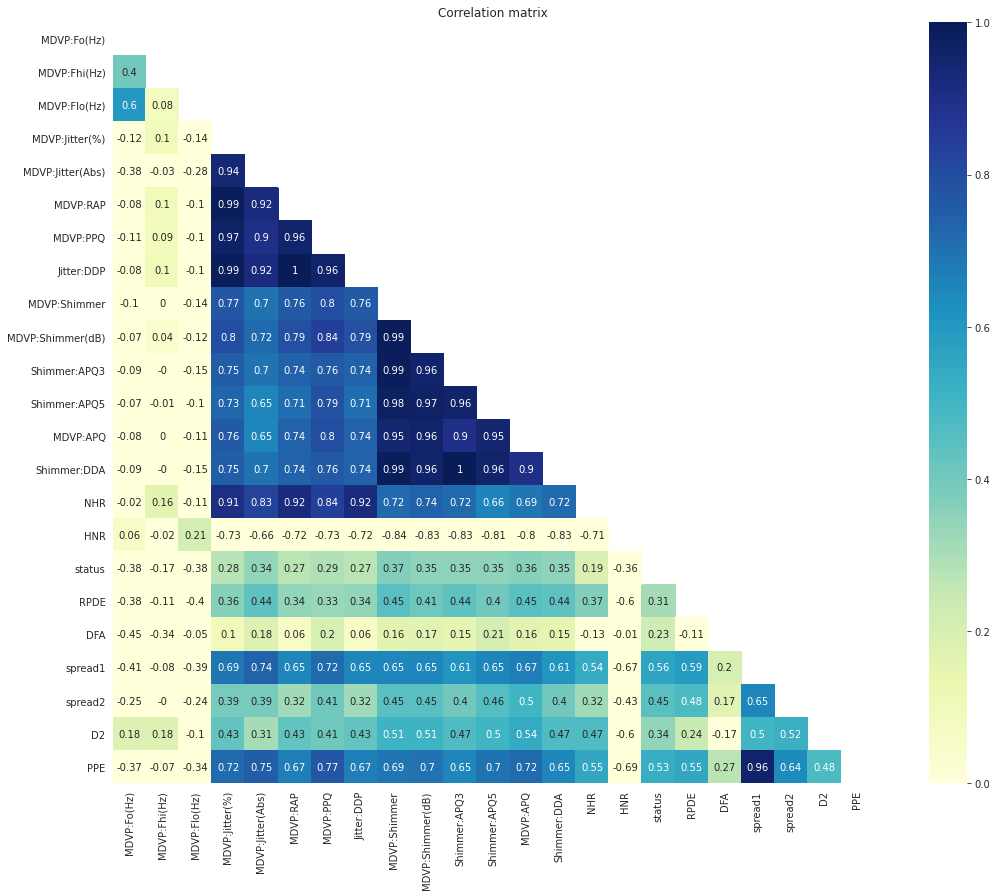

In [ ]:
correlation = round(df.corr(), 2)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 14))
    ax = sns.heatmap(correlation, cmap="YlGnBu", annot = True,
            mask=mask, square=True, vmin=0, vmax=1).set(title = 'Correlation matrix')



MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP.\
MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other.\
The target variable status has a weak positive corelation with all the other variables



## **C. Model Building**

In this section, we test a range of models:  ***KNeighborsClassifier***, ***RandomForestClassifier***, ***Naives vayes***, ***XgboostClassifier*** et ***DecisionTreeClassifier***.\
The best model chosen will be the one with better accuracy and better f1_score.

In [12]:
#Load packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score


In [26]:
#Data preprocessing
df = df.dropna()
X = df.drop(['name', 'status'],axis=1)
y = df["status"].astype("bool")
print(X.shape)
print(y.shape)

#Rescaling and transforming data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Data splitting and selection
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size = 0.3, random_state = 150)

(195, 22)
(195,)


In [27]:
##RandoForestClassification Model
model = RandomForestClassifier(n_jobs=-1, random_state=50)
parameters={'max_depth':[1,2,3,4,5,10],
           'n_estimators':[1,2,3,4,5,10],
              'max_features':[1,2,3,4,5,10],
               'criterion':['gini'],
               'bootstrap':[True],
               'min_samples_leaf':[1,2,3,4]
             }

In [ ]:
## GridSearchCV for finding the best parameters
mod_forest = GridSearchCV(estimator=model,param_grid=parameters, cv=5)

In [29]:
##Train the RDF model
%%timeit
mod_forest.fit(X_train,y_train)

1 loop, best of 3: 7min 23s per loop


In [30]:
#get best parameter of RDF model
print(mod_forest.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 10}


In [31]:
%%timeit
##Add best parameters of RandomForest 
##Test others models: Xgboost, KNN, Naive bayes, Decision Tree

ESTIMATORS = {"RandomForestClassifier": RandomForestClassifier(bootstrap=True, criterion='gini', 
                                     max_depth=5, max_features=10, 
                                     min_samples_leaf=2, n_estimators=10, random_state=50),
    "XgbClassifier": xgb.XGBClassifier(max_depth = 3, 
                                       n_estimators = 10, objective = 'binary:logistic'),
    "K-nn": KNeighborsClassifier(n_neighbors=3),
    "Naive-bayes": GaussianNB(),                     
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion='entropy', random_state=10, max_depth=6)
}

The slowest run took 11.98 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.8 µs per loop


In [25]:
##Get accuracy and f1_score
y_test_predict = dict()
accur = dict()
f_score = dict()

for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                  
    y_test_predict[name] = estimator.predict(X_test)   
    accur[name] = accuracy_score(y_test, estimator.predict(X_test))
    print("Accuracy of ",name," ", round(accur[name]*100,2),"%")
    f_score[name] = f1_score(y_test, estimator.predict(X_test))
    print("f1_score ",name," ", round(f_score[name]*100,2),"%")
    

Accuracy of  RandomForestClassifier   88.14 %
f1_score  RandomForestClassifier   92.78 %
Accuracy of  XgbClassifier   94.92 %
f1_score  XgbClassifier   96.97 %
Accuracy of  K-nn   94.92 %
f1_score  K-nn   97.03 %
Accuracy of  Naive-bayes   67.8 %
f1_score  Naive-bayes   77.65 %
Accuracy of  DecisionTreeClassifier   86.44 %
f1_score  DecisionTreeClassifier   91.67 %


## ***Model choice***


##### As KNN and Xgboost model accuracy are equal, the choice is base on their F1 score. 
##### For this study, model with KNN present most accuracy and F1_score.